# SIR Modeling

### Math

- S
- I
- R
- N = S + I + R
- beta
    - E
    - P
- D
- gamma
- R0

- R0 = beta / gamma
- D = 1 / gamma
- D = 10
- gamma = 0.1
- beta = 0.22
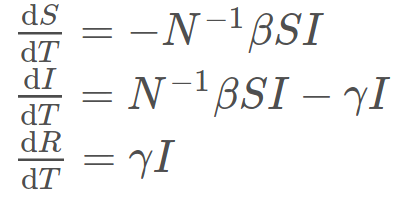

### Implementation

In [492]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

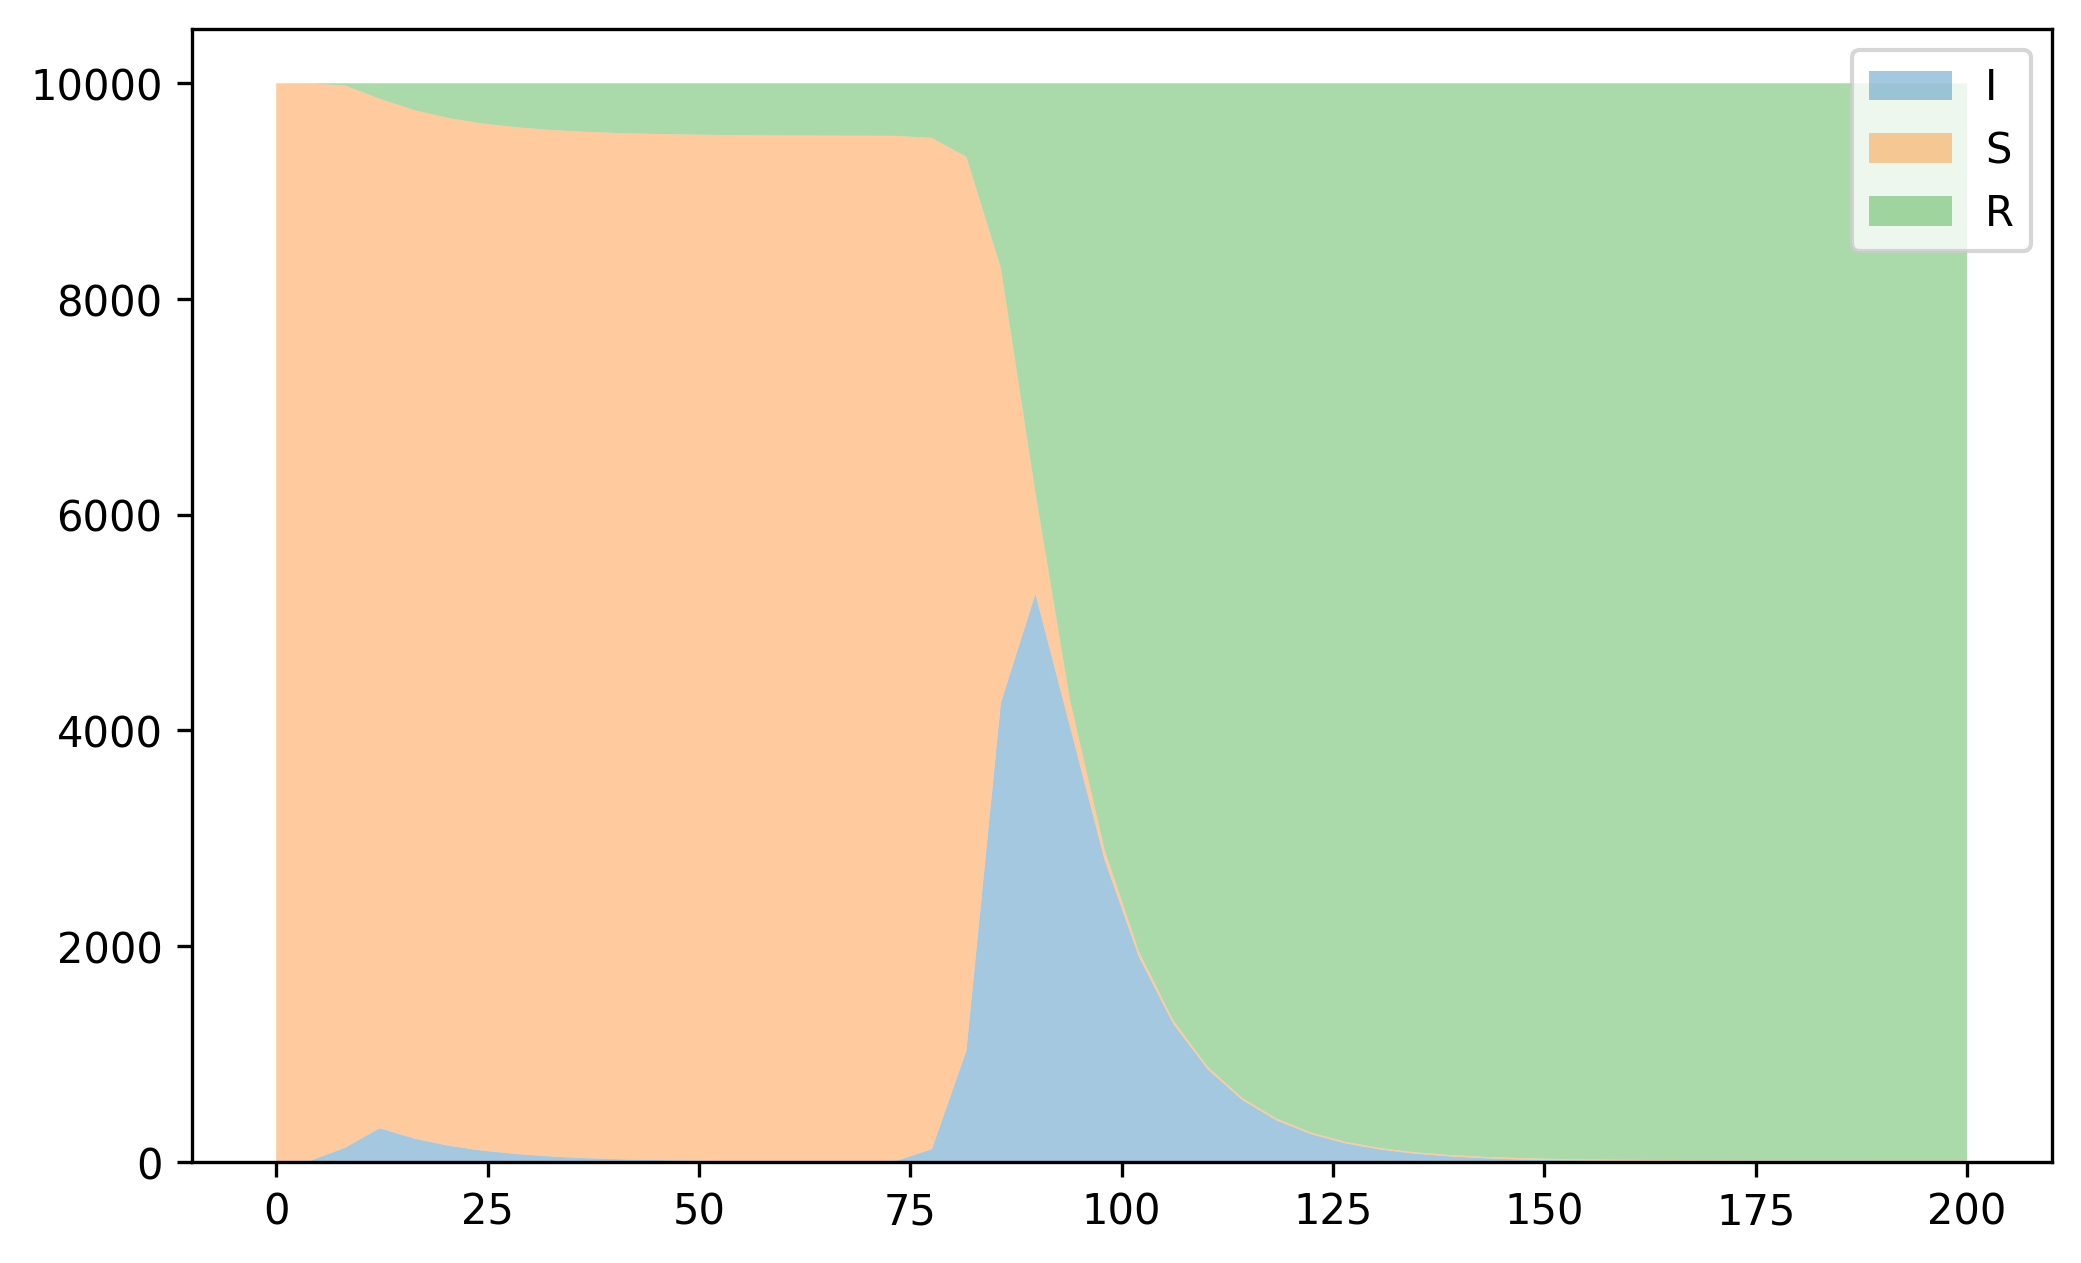

In [506]:
N = 10_000
I0 = 1
R0 = 0
S0 = N - I0 - R0
beta = 0.7
gamma = 0.1

t_max = 200
t = np.linspace(0, t_max)

def model(y, t, N, beta, gamma):
    S, I, R = y
    
    if t > 10 and t < 70:
        beta = 0.01
    else:
        beta = 0.7
    
    dSdt = (-beta * S * I) / N
    dIdt = (beta * S * I) / N - gamma * I
    dRdt = gamma * I
    
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(model, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

plt.figure(figsize=(8, 5), dpi=300)
plt.stackplot(t, [I, S, R], labels=['I', 'S', 'R'], alpha=0.4)
plt.legend()
plt.show()